In [12]:
# adapted from lecture 2 demo code kmeans_digit.py
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import show_image
from scipy.sparse import csc_matrix, find
import time
#kmeans algorithm

def kmeans_alg(pixels,k):
    #pixels - input image 
    #k number of desired clusters
    
    ##source:https://stackoverflow.com/questions/10439104/reading-bmp-files-in-python
    image = plt.imread(pixels)
    # https://datacarpentry.org/image-processing/02-image-basics.html
    x= image.reshape(-1,3) #reshaping to 2d array for matrices calcs
    m = x.shape[1]
    #print(x.shape)
    
    #STEP1: RANDOMLY INITALIZED CENTROIDS
    #np.random.seed(3)
    #c= np.random.randint(0,255,size= [k,3]) --> this only works for 'football.bmp' for some reason
    #https://stackoverflow.com/questions/63337505/assigning-random-centroids-by-index
    indx = np.random.choice(x.shape[0], k, replace=False)
    c = x[indx]
    print(c)
    #print(c)
    #print(c.shape)
    
    
    iterno = 200
    count= 0
    for iter in range(0, iterno):
        count = count +1
        #print("--iteration %d \n" % iter)

        #STEP 2: DECIDE CLUSTER MEMBERSHIPS
        #CALC L2-NORM 
        #https://stackoverflow.com/questions/4370975/python-numpy-euclidean-distance-calculation-between-matrices-of-row-vectors
        #https://numpy.org/doc/stable/user/basics.broadcasting.html helped resolve broadcasting error with np.newaxis
        #print(c[ :, np.newaxis].shape)
        dist = (x - c[ :, np.newaxis]) ** 2
        dist = np.sum(dist, axis=2) #adjusted for axis=2 since newaxis added a column in the middle
        dist = np.sqrt(dist)
        #print(dist.shape)
        
        #assign to nearest centroid- similar to kmeans_digit file except switched back to argmin here
        labels= np.argmin(dist, axis=0)
        #print(labels)
        
        #STEP 3: ADJUST CLUSTERS
        #https://dev.to/sajal2692/coding-k-means-clustering-using-python-and-numpy-fg1
        new_c = np.empty((k, m))
        for i in range(k):
            new_c[i] = np.mean(x[labels ==i], axis=0)
        #print(new_c)
        
        #STEP4: DID THE CLUSTERS MOVE?
        #https://stackoverflow.com/questions/45583472/how-to-find-the-difference-between-two-matrices-in-python-with-the-result-should
        diff= np.abs(new_c - c)
        #print(diff)
        #error comment suggested I use np.all or np.any
        if not np.any(diff):
            break
            
        c=new_c
    print('# of iterations:{}'.format(count))
    return labels, new_c

        

seed: 3
[[ 92  45 173]
 [191  87 224]
 [ 75  34 152]
 [138  67 195]
 [208  80 227]
 [185  81 230]]
# of iterations:59


seed: 4
[[ 85  45 159]
 [209 110 252]
 [217 192 249]
 [181 106 235]
 [129  68 198]
 [212 103 248]]
# of iterations:57


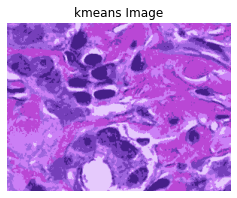

seed: 5
[[163  71 214]
 [143  70 203]
 [217 126 255]
 [136  44 181]
 [160  96 234]
 [209  91 239]]
# of iterations:52


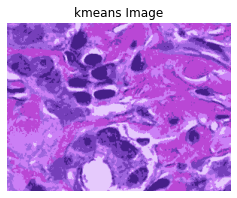

seed: 3
[[197 174 140]
 [ 70 102 159]
 [ 26  28  43]
 [193 152 130]
 [103 116  63]
 [172 162 152]]
# of iterations:44


seed: 4
[[184 198 227]
 [167 113  85]
 [190 159 167]
 [190 145 114]
 [109 131  84]
 [105 129  79]]
# of iterations:61


seed: 5
[[216 226 235]
 [ 87  97  99]
 [ 57  50  44]
 [191 189 112]
 [233 188 169]
 [216 216 214]]
# of iterations:39


seed: 3
[[194 190 187]
 [112 130 130]
 [132 150 174]
 [127 153 178]
 [147 156 173]
 [145 147 159]]
# of iterations:44


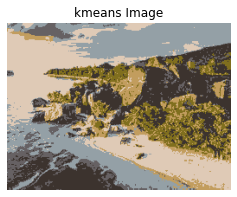

seed: 4
[[142 164 151]
 [ 94  96  13]
 [179 114  58]
 [ 55  36  58]
 [162 149  44]
 [247 199 150]]
# of iterations:47


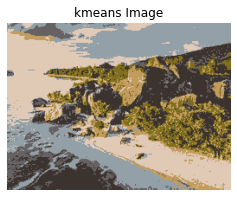

seed: 5
[[249 218 189]
 [209 202 210]
 [140  95  66]
 [185 191 205]
 [207 203 194]
 [ 53  59  85]]
# of iterations:46


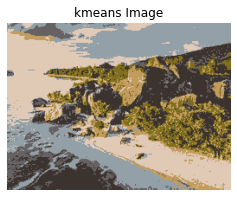

In [22]:
pixels= ['hestain.bmp', 'football.bmp', 'image.bmp'] 
k=6

seed= [3,4,5]

for p in pixels:
    image = plt.imread(p)
    for i in seed:
        print('seed: {}'.format(i))
        np.random.seed(i)
        labels, centroids= kmeans_alg(p,k) 

        #new image
        #can map labels to centroids using method below. https://stackoverflow.com/questions/32086747/could-not-link-labels-with-centroids-in-kmeans-sklearn
        kmeans_image = centroids[labels].reshape(image.shape)

        plt.figure(figsize=(4,6))
        plt.title('kmeans Image')
        plt.imshow(kmeans_image.astype(np.uint8))
        plt.axis('off')

        plt.show()

Cluster: 2
[[229 238 235]
 [135 115 204]]
# of iterations:25
time to connverge:0.2


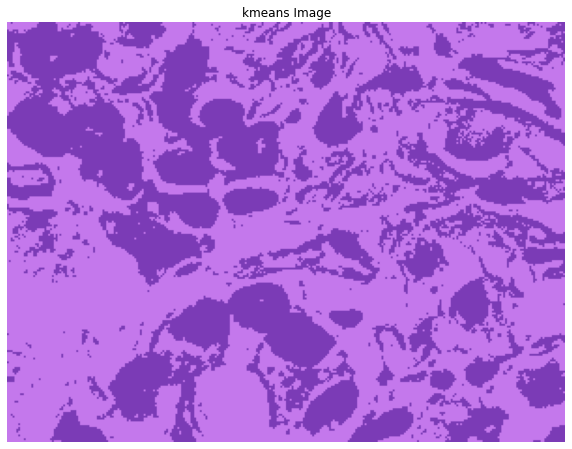

Cluster: 3
[[213  64 216]
 [ 77  39 152]
 [223 212 255]]
# of iterations:39
time to connverge:0.32


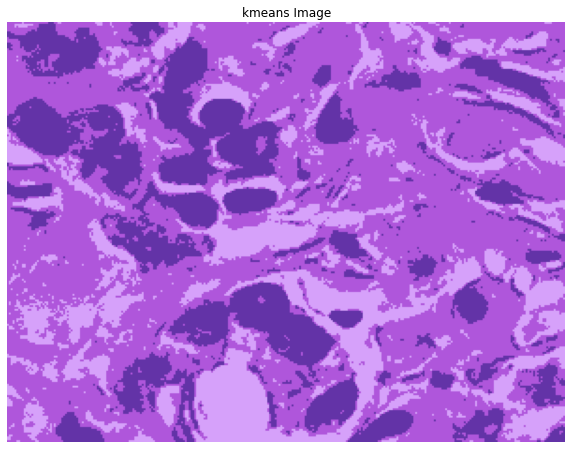

Cluster: 4
[[205  84 239]
 [195 174 231]
 [148  95 201]
 [196  85 226]]
# of iterations:61
time to connverge:0.58


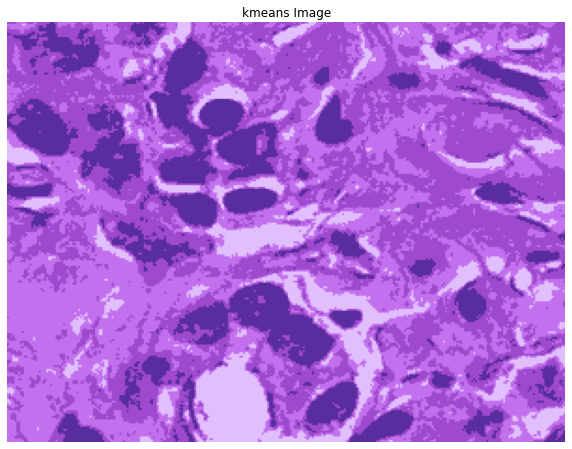

Cluster: 5
[[217 115 251]
 [219 147 247]
 [204  91 235]
 [236 161 254]
 [186 123 227]]
# of iterations:64
time to connverge:0.71


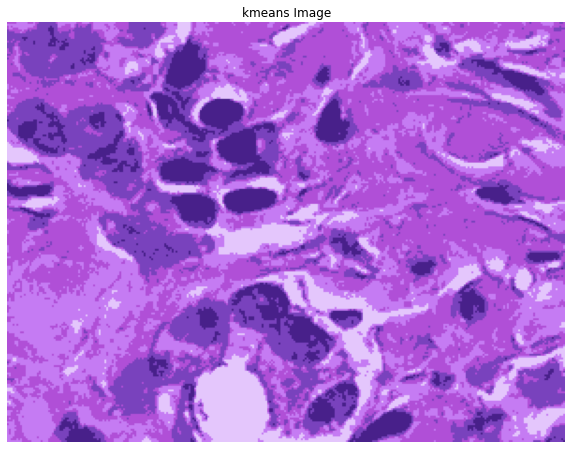

Cluster: 6
[[226 108 254]
 [202 121 242]
 [178  65 217]
 [124  79 196]
 [123  72 201]
 [197  72 224]]
# of iterations:51
time to connverge:0.66


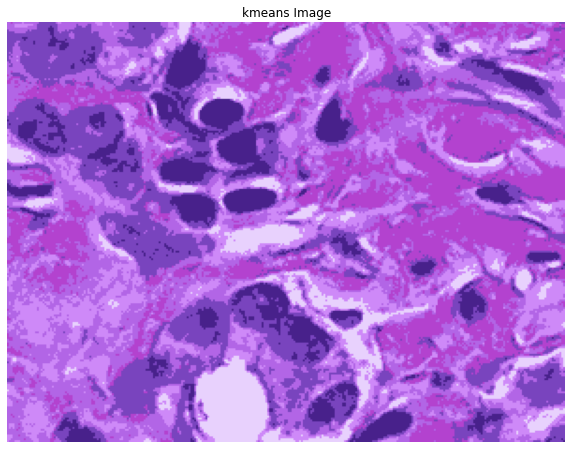

Cluster: 2
[[172 162  91]
 [222 226 225]]
# of iterations:22
time to connverge:0.49


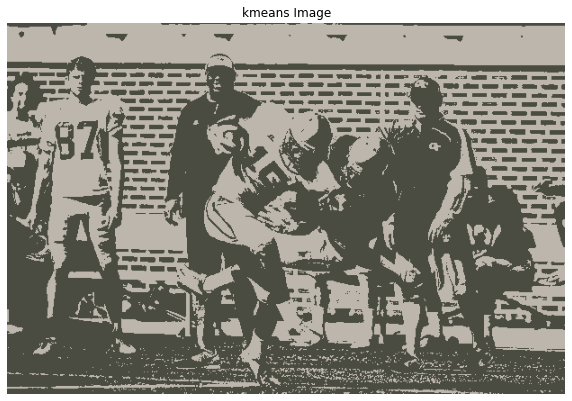

Cluster: 3
[[187 110  80]
 [ 11  54  99]
 [ 60  89 145]]
# of iterations:16
time to connverge:0.47


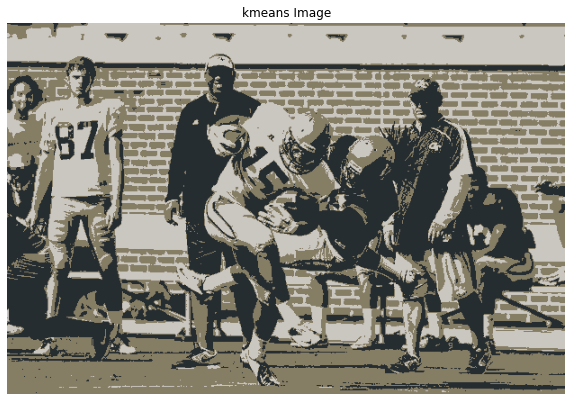

Cluster: 4
[[  0  35  72]
 [182 134 111]
 [ 23  23  25]
 [ 86 114 187]]
# of iterations:35
time to connverge:1.28


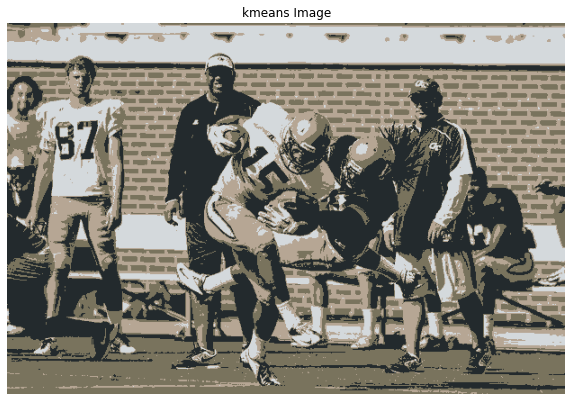

Cluster: 5
[[146 100  84]
 [147  99  85]
 [163 112  95]
 [  0  48  96]
 [141 129 117]]
# of iterations:35
time to connverge:1.47


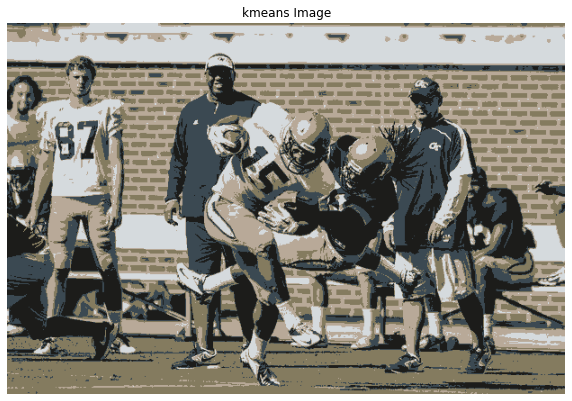

Cluster: 6
[[ 63  59  50]
 [128 154  91]
 [ 24  52  89]
 [163  97  73]
 [  7  12  31]
 [186 186 176]]
# of iterations:42
time to connverge:2.02


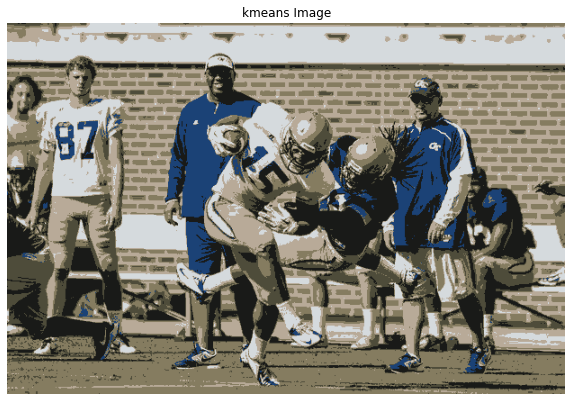

Cluster: 2
[[56 39 58]
 [71 57 90]]
# of iterations:11
time to connverge:0.05


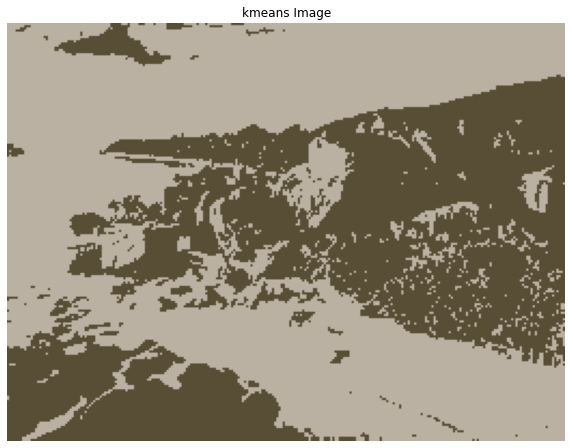

Cluster: 3
[[170 179 162]
 [213 156 137]
 [ 43  71  74]]
# of iterations:24
time to connverge:0.14


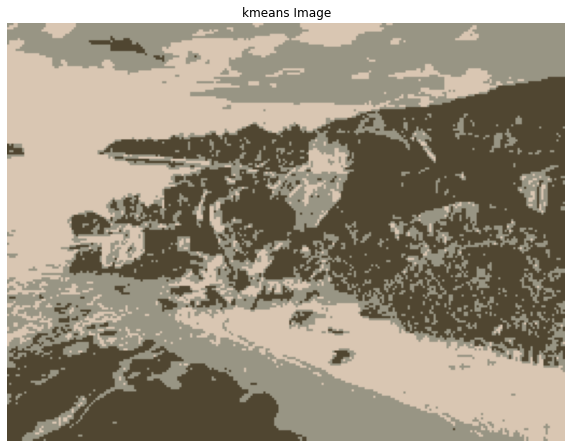

Cluster: 4
[[231 193 157]
 [161 136 116]
 [ 84  85 113]
 [161 180 187]]
# of iterations:29
time to connverge:0.21


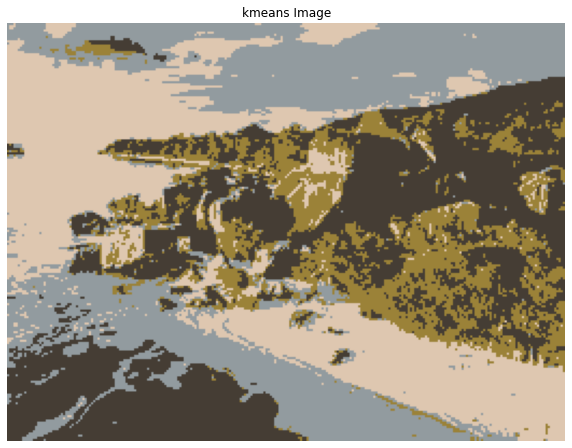

Cluster: 5
[[ 87 105 117]
 [197 160 141]
 [ 42  47  76]
 [ 98 103 122]
 [152 180 194]]
# of iterations:100
time to connverge:0.85


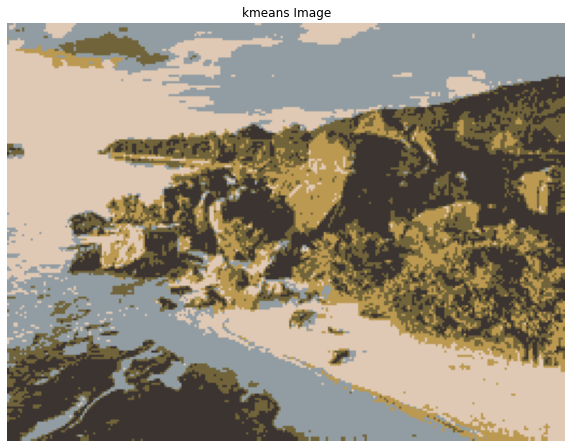

Cluster: 6
[[156 168 144]
 [ 46  17  21]
 [ 56  87  89]
 [170 176 190]
 [161 140  35]
 [173 189 186]]
# of iterations:39
time to connverge:0.38


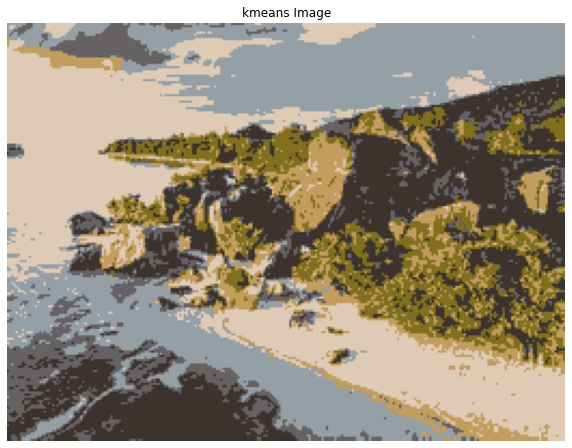

In [18]:
pixels= ['hestain.bmp', 'football.bmp', 'image.bmp'] 
k=[2,3,4,5,6]

for p in pixels:
    image = plt.imread(p)
    for i in k:
        print('Cluster: {}'.format(i))
        #https://stackoverflow.com/questions/12444004/how-long-does-my-python-application-take-to-run
        start_time= time.time()
        labels, centroids= kmeans_alg(p,i)

        end_time= time.time()
        diff_time= round(end_time-start_time, 2) #seconds
        print('time to connverge:{}'.format(diff_time)  ) 

        #new image
        #can map labels to centroids using method below. https://stackoverflow.com/questions/32086747/could-not-link-labels-with-centroids-in-kmeans-sklearn
        kmeans_image = centroids[labels].reshape(image.shape)

        plt.figure(figsize=(10,16))
        plt.title('kmeans Image')
        plt.imshow(kmeans_image.astype(np.uint8))
        plt.axis('off')

        plt.show()

# of iterations:26
# of iterations:35
# of iterations:66
# of iterations:61
# of iterations:56
# of iterations:42
# of iterations:63
# of iterations:78
# of iterations:94
# of iterations:96
# of iterations:54
# of iterations:111
# of iterations:77
# of iterations:104
# of iterations:112
# of iterations:105
# of iterations:83
# of iterations:183
# of iterations:17
# of iterations:12
# of iterations:35
# of iterations:32
# of iterations:56
# of iterations:35
# of iterations:39
# of iterations:47
# of iterations:89
# of iterations:49
# of iterations:67
# of iterations:100
# of iterations:114
# of iterations:125
# of iterations:115
# of iterations:105
# of iterations:83
# of iterations:108
# of iterations:11
# of iterations:47
# of iterations:31
# of iterations:127
# of iterations:45
# of iterations:53
# of iterations:53
# of iterations:58
# of iterations:50
# of iterations:94
# of iterations:87
# of iterations:68
# of iterations:93
# of iterations:193
# of iterations:89
# of iterations:67

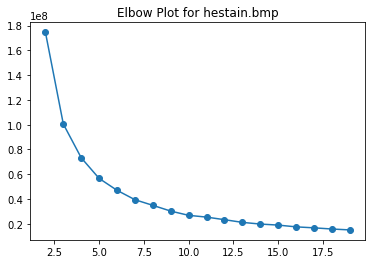

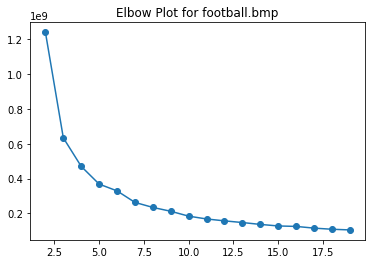

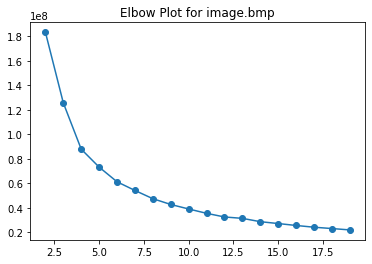

In [3]:
pixels= ['hestain.bmp', 'football.bmp', 'image.bmp'] 
k=range(2,20)

ss_dict = {}
for p in pixels:
    image = plt.imread(p)
    image = image.reshape(-1,3)
    ss = []
    for i in k:
        np.random.seed(3)
        labels, centroids = kmeans_alg(p, i)
        #calculating sum of squares
        # Inertia method: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
        ##can map labels to centroids using method below. https://stackoverflow.com/questions/32086747/could-not-link-labels-with-centroids-in-kmeans-sklearn
        ss_= (np.sum((image - centroids[labels]) ** 2))
        ss.append(ss_)
    ss_dict[p] = ss

# Plot the elbow plot for each image
for p in pixels:
    plt.figure()
    plt.plot(k, ss_dict[p], marker='o', linestyle='-')
    plt.title('Elbow Plot for {}'.format(p))
    plt.show()